In [2]:
import os
import numpy as np
import cv2

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.optimizers import Adam 
from keras.models import load_model

In [3]:
base = 'git/facial-expression-recognization/images'
train_set = os.path.join(base,'train')
validation_set = os.path.join(base,'validation')
angry_set = os.path.join(train_set, 'angry')
disgust_set = os.path.join(train_set, 'disgust')
fear_set = os.path.join(train_set, 'fear')
happy_set = os.path.join(train_set, 'happy')
neutral_set = os.path.join(train_set, 'neutral')
sad_set = os.path.join(train_set, 'sad')
surprise_set = os.path.join(train_set, 'surprise')

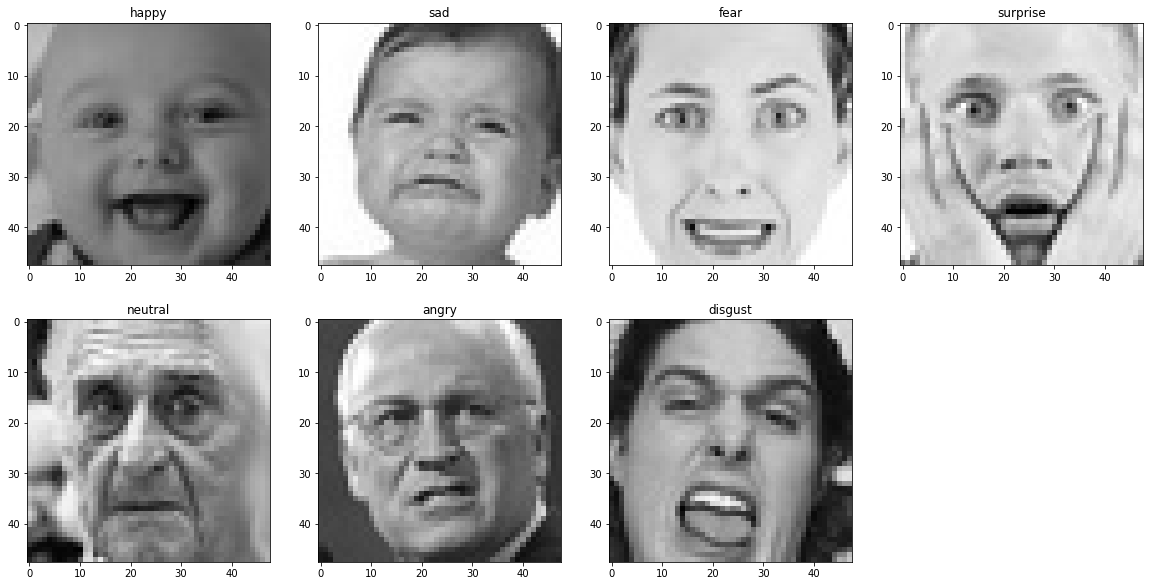

In [4]:
#show one emotion each
example_list = [(os.path.join(train_set,folder)) for folder in os.listdir(train_set) if os.path.isdir(os.path.join(train_set,folder)) == True]
title_list = [folder for folder in os.listdir(train_set) if os.path.isdir(os.path.join(train_set,folder)) == True ]
fig= plt.figure(figsize=(20,10))
for i, img_path in enumerate(example_list):
    sp = plt.subplot(2, 4, i + 1)
    plt.title(title_list[i])
    img = cv2.imread(os.path.join(example_list[i],os.listdir(img_path)[0]))
    plt.imshow(img)
plt.show()

In [5]:
#train the model

padding = 'valid'
img_input = layers.Input(shape=(96,96,1))

# START MODEL
conv_1 = layers.Conv2D(64, (5, 5), strides=(2, 2), padding=padding, activation='relu', name='conv_1')(img_input)
maxpool_1 = layers.MaxPooling2D((2, 2), strides=(2,2))(conv_1)
x = layers.BatchNormalization()(maxpool_1)
    
# FEAT-EX1
conv_2a = layers.Conv2D(96, (1, 1), strides=(1,1), activation='relu', padding=padding, name='conv_2a')(x)
conv_2b = layers.Conv2D(208, (3, 3), strides=(1,1), activation='relu', padding=padding, name='conv_2b')(conv_2a)
maxpool_2a = layers.MaxPooling2D((3,3), strides=(1,1), padding=padding, name='maxpool_2a')(x)
conv_2c = layers.Conv2D(64, (1, 1), strides=(1,1), name='conv_2c')(maxpool_2a)
concat_1 = layers.concatenate(inputs=[conv_2b,conv_2c], axis=3,name='concat2')
maxpool_2b = layers.MaxPooling2D((3,3), strides=(2,2), padding=padding, name='maxpool_2b')(concat_1)

# FEAT-EX2
conv_3a = layers.Conv2D(96, (1, 1), strides=(1,1), activation='relu', padding=padding, name='conv_3a')(maxpool_2b)
conv_3b = layers.Conv2D(208, (3, 3), strides=(1,1), activation='relu', padding=padding, name='conv_3b')(conv_3a)
maxpool_3a = layers.MaxPooling2D((3,3), strides=(1,1), padding=padding, name='maxpool_3a')(maxpool_2b)
conv_3c = layers.Conv2D(64, (1, 1), strides=(1,1), name='conv_3c')(maxpool_3a)
concat_3 = layers.concatenate(inputs=[conv_3b,conv_3c],axis=3,name='concat3')
maxpool_3b = layers.MaxPooling2D((3,3), strides=(1,1), padding=padding, name='maxpool_3b')(concat_3)
    
# FINAL LAYERS
net = layers.Flatten()(maxpool_3b)
net = layers.Dense(7,'softmax', name='predictions')(net)
    


In [6]:
model = Model(img_input, net)

model.summary()
model.compile(optimizer = Adam(lr=0.001), loss = 'categorical_crossentropy', metrics=['accuracy'] )

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 46, 46, 64)   1664        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 23, 23, 64)   0           conv_1[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 23, 23, 64)   256         max_pooling2d[0][0]              
_______________________________________________________________________________________

In [7]:
train_generator = ImageDataGenerator(rescale = 1./255)
validation_generator = ImageDataGenerator(rescale = 1./255)

train = train_generator.flow_from_directory(train_set,
                                           target_size = (96,96),
                                           color_mode = 'grayscale',
                                           batch_size = 64,
                                           class_mode = 'categorical')
validation = validation_generator.flow_from_directory(validation_set,
                                           target_size = (96,96),
                                           color_mode = 'grayscale',
                                           batch_size = 64,
                                           class_mode = 'categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [8]:
output = model.fit_generator(train,
                             steps_per_epoch = 451,
                             epochs = 60,
                             validation_data = validation,
                             validation_steps = 108,
                             verbose = 1)
model.save("model.h5")

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/60
451/451 [==============================] - 494s 1s/step - loss: 1.5119 - accuracy: 0.4128 - val_loss: 1.5248 - val_accuracy: 0.4744
Epoch 2/60
451/451 [==============================] - 108s 240ms/step - loss: 1.2272 - accuracy: 0.5349 - val_loss: 1.3084 - val_accuracy: 0.5122
Epoch 3/60
451/451 [==============================] - 109s 242ms/step - loss: 1.1193 - accuracy: 0.5815 - val_loss: 1.2280 - val_accuracy: 0.5486
Epoch 4/60
451/451 [==============================] - 33744s 75s/step - loss: 1.0264 - accuracy: 0.6168 - val_loss: 1.2578 - val_accuracy: 0.5266
Epoch 5/60
451/451 [==============================] - 86s 190ms/step - loss: 0.9450 - accuracy: 0.6463 - val_loss: 1.2412 - val_accuracy: 0.5545
Epoch 6/60
451/451 [==============================] - 90s 199ms/step - loss: 0.8693 - accuracy: 0.6788 - val_loss: 1.3051 - val_accuracy: 0.5399
Epoch 7/60
451/451 [==============================] -